# Import libraries

In [347]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Read data from csv

In [281]:
data_transaction = pd.read_csv("ieee-fraud-detection/train_transaction.csv")
data_identity = pd.read_csv("ieee-fraud-detection/train_identity.csv")

# Analyse transaction data and clean it

In [282]:
data_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data description:

TransactionDT: timedelta from a given reference datetime (not an actual timestamp)

TransactionAMT: transaction payment amount in USD

ProductCD: product code, the product for each transaction

card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.

addr: address

dist: distance

P_ and (R__) emaildomain: purchaser and recipient email domain

C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.

D1-D15: timedelta, such as days between previous transaction, etc.

M1-M9: match, such as names on card and address, etc.

Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.

## Categorical Features:

ProductCD

card1 - card6

addr1, addr2

Pemaildomain Remaildomain

M1 - M9

In [283]:
data_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [284]:
data_transaction.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000,104060.000000


### Since TransactionDT, TransactionID and Dx columns are not something which is corelative to our problem statement, we will drop this column

In [285]:
data_transaction.drop(['TransactionDT'], axis=1, inplace = True)

In [286]:
data_transaction.drop(['TransactionID'], axis=1, inplace = True)

In [287]:
data_transaction.drop(['D%d' % number for number in range(1,16)],axis = 1,inplace=True)

## Drop rows with many NAN values

In [288]:
data_transaction.dropna(thresh=int(0.8*len(data_transaction.columns)),inplace = True)

In [289]:
data_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56501 entries, 10 to 590529
Columns: 377 entries, isFraud to V339
dtypes: float64(361), int64(2), object(14)
memory usage: 162.9+ MB


### Attribute: ProductCD

In [290]:
data_transaction["ProductCD"].unique()

array(['C', 'H', 'S', 'R'], dtype=object)

#### Mapping
#### 'H':1
#### 'C':2
#### 'S':3
#### 'R':4

In [291]:
data_transaction['ProductCD'].replace('H',1,inplace = True)
data_transaction['ProductCD'].replace('C',2,inplace = True)
data_transaction['ProductCD'].replace('S',3,inplace = True)
data_transaction['ProductCD'].replace('R',4,inplace = True)

In [292]:
data_transaction.head()

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
10,0,75.887,2,16496,352.0,117.0,mastercard,134.0,credit,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,0,16.495,2,4461,375.0,185.0,mastercard,224.0,debit,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,0,75.887,2,13329,569.0,117.0,visa,226.0,credit,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0,42.294,2,15885,545.0,185.0,visa,138.0,debit,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,0,3.595,2,12730,266.0,185.0,mastercard,224.0,credit,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [293]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(data_transaction['isFraud'], data_transaction['ProductCD'])[:2]

In [294]:
df_cf = pd.DataFrame([i[1:] for i in cf], columns=np.unique(data_transaction['ProductCD']), index = np.unique(data_transaction['isFraud']))

In [295]:
df_cf

,1,2,3,4
0,1879,41676,3095,4303
1,21,5411,81,35


In [296]:
df_cf = df_cf.div(df_cf.sum(axis=1), axis=0)

In [297]:
df_cf

,1,2,3,4
0,0.036877,0.817930,0.060742,0.084450
1,0.003785,0.975306,0.014600,0.006309


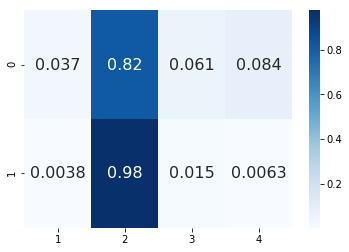

In [298]:
sns.heatmap(df_cf, cmap="Blues", annot=True,annot_kws={"size": 16})

### Based on the above observation, ProductCD is also not much of importance

In [299]:
data_transaction.drop(['ProductCD'], axis=1, inplace = True)

### Will alo drop R_emaildomain and Cx columns for simplicity

In [300]:
data_transaction["R_emaildomain"].unique()

array(['gmail.com', 'hotmail.com', 'outlook.com', 'anonymous.com', nan,
       'live.com.mx', 'yahoo.com', 'att.net', 'yahoo.com.mx',
       'icloud.com', 'servicios-ta.com', 'hotmail.es', 'verizon.net',
       'comcast.net', 'scranton.edu', 'mac.com', 'live.com', 'me.com',
       'aol.com', 'cox.net', 'msn.com', 'prodigy.net.mx',
       'suddenlink.net', 'web.de', 'hotmail.fr', 'hotmail.de',
       'outlook.es', 'gmx.de', 'bellsouth.net', 'yahoo.fr', 'yahoo.co.uk',
       'live.fr', 'cfl.rr.com', 'hotmail.co.uk', 'embarqmail.com',
       'frontier.com', 'sbcglobal.net', 'ymail.com', 'mail.com',
       'rocketmail.com', 'roadrunner.com', 'centurylink.net', 'yahoo.de',
       'gmail', 'earthlink.net', 'charter.net', 'windstream.net',
       'optonline.net', 'ptd.net', 'q.com', 'twc.com', 'cableone.net',
       'juno.com', 'frontiernet.net', 'sc.rr.com', 'netzero.net',
       'protonmail.com', 'yahoo.co.jp', 'yahoo.es', 'netzero.com',
       'aim.com'], dtype=object)

In [301]:
data_transaction.drop(['R_emaildomain'], axis=1, inplace = True)

In [302]:
data_transaction.drop(['C%d' % number for number in range(1,15)],axis = 1,inplace=True)

## Drop column with many NAN values

In [303]:
data_transaction.dropna(thresh=int(0.95*len(data_transaction)),axis='columns', inplace=True)

In [304]:
data_transaction.head()

,isFraud,TransactionAmt,card1,card2,card3,card4,card5,card6,V12,V13,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
10,0,75.887,16496,352.0,117.0,mastercard,134.0,credit,0.0,0.0,...,90.327904,90.327904,90.327904,90.327904,0.0,0.0,0.0,75.887497,75.887497,75.887497
11,0,16.495,4461,375.0,185.0,mastercard,224.0,debit,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
40,0,75.887,13329,569.0,117.0,visa,226.0,credit,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
48,0,42.294,15885,545.0,185.0,visa,138.0,debit,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
49,0,3.595,12730,266.0,185.0,mastercard,224.0,credit,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [305]:
data_transaction.dropna(inplace = True)

## card details

In [306]:
data_transaction[['card%d' % number for number in range(1,7)]].head()

,card1,card2,card3,card4,card5,card6
10,16496,352.0,117.0,mastercard,134.0,credit
11,4461,375.0,185.0,mastercard,224.0,debit
40,13329,569.0,117.0,visa,226.0,credit
48,15885,545.0,185.0,visa,138.0,debit
49,12730,266.0,185.0,mastercard,224.0,credit


In [307]:
data_transaction["card4"].unique()

array(['mastercard', 'visa', 'discover', 'american express'], dtype=object)

#### Mapping
#### 'mastercard':1
#### 'american express':2
#### 'visa':3
#### 'discover':4

In [308]:
data_transaction['card4'].replace('mastercard',1,inplace = True)
data_transaction['card4'].replace('american express',2,inplace = True)
data_transaction['card4'].replace('visa',3,inplace = True)
data_transaction['card4'].replace('discover',4,inplace = True)

In [309]:
data_transaction.card6.unique()

array(['credit', 'debit'], dtype=object)

#### Mapping
#### 'credit':1
#### 'debit':2


In [310]:
data_transaction['card6'].replace('credit',1,inplace = True)
data_transaction['card6'].replace('debit',2,inplace = True)

### Normalize card values

In [311]:
data_transaction["card1"] = data_transaction["card1"] / data_transaction["card1"].max()
data_transaction["card2"] = data_transaction["card2"] / data_transaction["card2"].max()
data_transaction["card3"] = data_transaction["card3"] / data_transaction["card3"].max()
data_transaction["card5"] = data_transaction["card5"] / data_transaction["card5"].max()


In [312]:
data_transaction.head()

,isFraud,TransactionAmt,card1,card2,card3,card4,card5,card6,V12,V13,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
10,0,75.887,0.897644,0.588629,0.506494,1,0.565401,1,0.0,0.0,...,90.327904,90.327904,90.327904,90.327904,0.0,0.0,0.0,75.887497,75.887497,75.887497
11,0,16.495,0.242749,0.627090,0.800866,1,0.945148,2,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
40,0,75.887,0.725309,0.951505,0.506494,3,0.953586,1,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
48,0,42.294,0.864396,0.911371,0.800866,3,0.582278,2,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
49,0,3.595,0.692714,0.444816,0.800866,1,0.945148,1,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000


## Working with Vx columns
## Will use PCA to reduce it to 20 features

In [313]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)

In [314]:
Vx_columns = [i for i in data_transaction.columns if i[0] == 'V']

In [315]:
len(Vx_columns)

241

In [316]:
principalComponents = pca.fit_transform(data_transaction[Vx_columns])

In [317]:
principalComponents.shape

(52494, 20)

In [318]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['V%d_pca' % number for number in range(1,21)])

In [319]:
data_transaction.drop(Vx_columns, axis=1, inplace = True)

In [320]:
data_transaction.shape

(52494, 8)

In [321]:
data_transaction = pd.concat([data_transaction.reset_index(drop=True), principalDf.reset_index(drop=True)], axis=1)

In [322]:
data_transaction.shape

(52494, 28)

In [323]:
data_transaction.head()

,isFraud,TransactionAmt,card1,card2,card3,card4,card5,card6,V1_pca,V2_pca,...,V11_pca,V12_pca,V13_pca,V14_pca,V15_pca,V16_pca,V17_pca,V18_pca,V19_pca,V20_pca
0,0,75.887,0.897644,0.588629,0.506494,1,0.565401,1,-5.452669,296.173734,...,10.988880,-227.056719,71.463103,39.794682,42.641586,-80.462150,-53.181582,-39.787529,44.368417,-22.186860
1,0,16.495,0.242749,0.627090,0.800866,1,0.945148,2,-375.128584,-60.765114,...,-8.298827,21.996101,-5.510014,-8.414835,4.837412,-0.852039,3.066956,2.490152,-2.352656,-1.130156
2,0,75.887,0.725309,0.951505,0.506494,3,0.953586,1,-37.358794,434.990358,...,-17.415633,-159.532522,104.649316,0.762735,35.154547,13.270473,63.667196,82.179196,59.432113,15.261514
3,0,42.294,0.864396,0.911371,0.800866,3,0.582278,2,-375.128584,-60.765114,...,-8.298827,21.996101,-5.510014,-8.414835,4.837412,-0.852039,3.066956,2.490152,-2.352656,-1.130156
4,0,3.595,0.692714,0.444816,0.800866,1,0.945148,1,-375.128619,-60.765174,...,-8.297230,22.000261,-5.511531,-8.422040,4.838534,-0.855883,3.066467,2.493116,-2.350642,-1.134395


In [326]:
print("Non fraud:" ,len(data_transaction[data_transaction['isFraud'] == 0]))

Non fraud: 47141


In [327]:
print("Fraud:" ,len(data_transaction[data_transaction['isFraud'] == 1]))

Fraud: 5353


# Data Visualization

In [348]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.figure("Plots")

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 842.4x595.44 with 0 Axes>

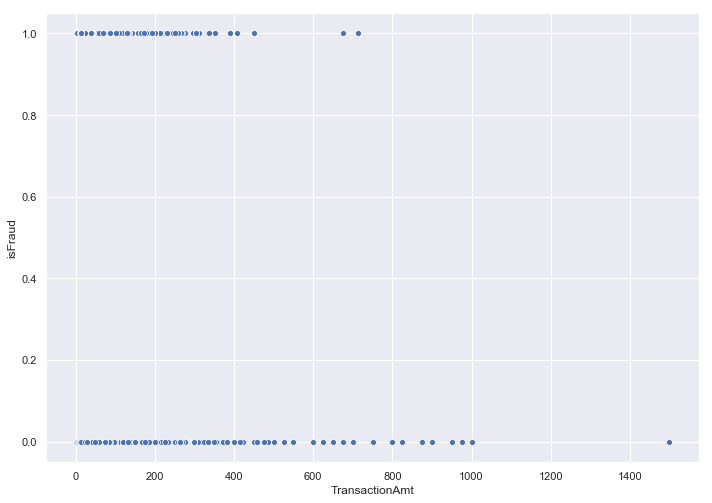

In [349]:
ax = sns.scatterplot(x="TransactionAmt", y="isFraud", data=data_transaction)

## Card Company vs Fraudness
#### Mapping
#### 'mastercard':1
#### 'american express':2
#### 'visa':3
#### 'discover':4

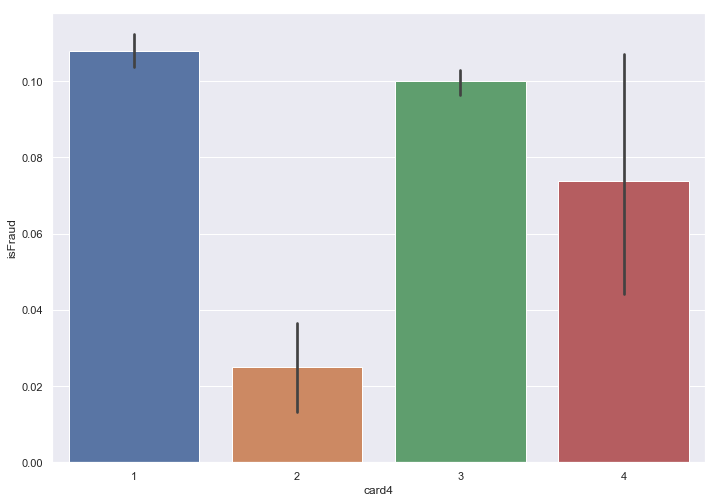

In [356]:
sns.barplot(x="card4", y="isFraud", data=data_transaction)


## Card type vs Fraudness
#### Mapping
#### 'credit':1
#### 'debit':2


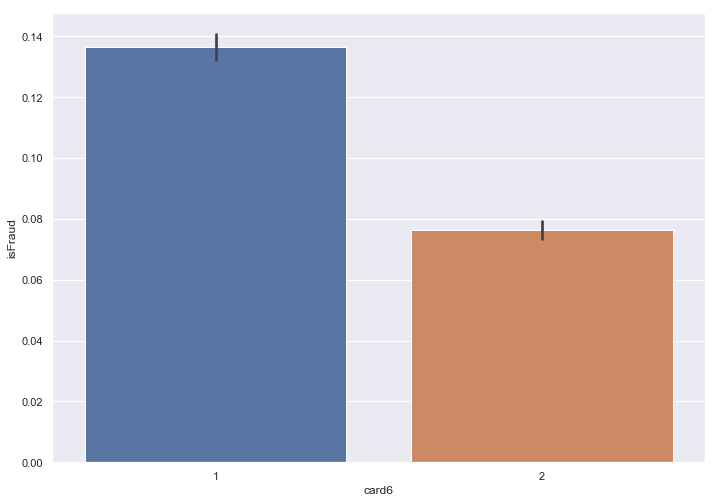

In [341]:
ax = sns.barplot(x="card6", y="isFraud", data=data_transaction)

# Train the ML model

In [357]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [359]:
X = data_transaction.drop("isFraud",axis = 1)
y = data_transaction.isFraud

In [360]:
model = LogisticRegression()

In [362]:
# Define the splitter for splitting the data in a train set and a test set
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=0)

# Loop through the splits (only one)
for train_indices, test_indices in splitter.split(X, y):
    # Select the train and test data
    X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
    X_test, y_test = X.iloc[test_indices], y.iloc[test_indices]
        
    # Fit and predict!
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # And finally: show the results
    print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.92      0.99      0.95     23571
           1       0.68      0.27      0.38      2676

   micro avg       0.91      0.91      0.91     26247
   macro avg       0.80      0.63      0.67     26247
weighted avg       0.90      0.91      0.89     26247



/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## From the classification report, it is evident from the metrics that the model is good in predicting the non-fraud cases and not upto the mark when it comes to fraud cases.

## This is also influenced by the bias in the data